Importing libriies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing x and y variables

In [4]:
x = df.drop(['math score'], axis=1)

In [5]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y= df['math score']

In [7]:
#create columns transformations with 3 types of transformers
num_features = x.select_dtypes(exclude=['object']).columns
cat_features = x.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ('onehotEncoder', categorical_transformer, cat_features),
        ('standardScaler', numeric_transformer, num_features)
    ]
)

In [8]:
x= preprocessor.fit_transform(x)

In [9]:
#separate the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))


create an evaluate function to give all metrics after model training

In [10]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    rmse = np.sqrt(mse)
    return mae, mse, r2, rmse

In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(eval_metric='rmse')
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #train model

    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2, *_ = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2, *_ = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training set")
    print("- root mean squared error : {:.4f}".format(model_train_rmse))
    print("- mean absolute error : {:.4f}".format(model_train_mae))
    print("- r2 score : {:.4f}".format(model_train_r2))

    print('----------------------------------------------------------')

    print("model performance for test set")
    print("- root mean squared error : {:.4f}".format(model_test_rmse))
    print("- mean absolute error : {:.4f}".format(model_test_mae))
    print("- r2 score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
model performance for training set
- root mean squared error : 28.3485
- mean absolute error : 4.2671
- r2 score : 0.8743
----------------------------------------------------------
model performance for test set
- root mean squared error : 29.1167
- mean absolute error : 4.2158
- r2 score : 0.8803


Lasso Regression
model performance for training set
- root mean squared error : 43.4784
- mean absolute error : 5.2063
- r2 score : 0.8071
----------------------------------------------------------
model performance for test set
- root mean squared error : 42.5064
- mean absolute error : 5.1579
- r2 score : 0.8253


Ridge Regression
model performance for training set
- root mean squared error : 28.3378
- mean absolute error : 4.2650
- r2 score : 0.8743
----------------------------------------------------------
model performance for test set
- root mean squared error : 29.0563
- mean absolute error : 4.2111
- r2 score : 0.8806


KNN
model performance for training set
- root

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'r2_list']).sort_values(by=['r2_list'], ascending=False)

,Model_name,r2_list
2,Ridge Regression,0.880593
0,Linear Regression,0.880345
5,Random Forest,0.847987
6,AdaBoost,0.843990
8,XGBoost,0.827797
1,Lasso Regression,0.825320
3,KNN,0.783813
4,Decision Tree,0.746485
7,SVR,0.728600



Linear Regression

In [13]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred= lin_model.predict(x_test)
score= r2_score(y_test, y_pred)*100
print(f"R2 score for Linear Regression model: {score:.2f}%")

R2 score for Linear Regression model: 88.03%


plot y_pred and y_test

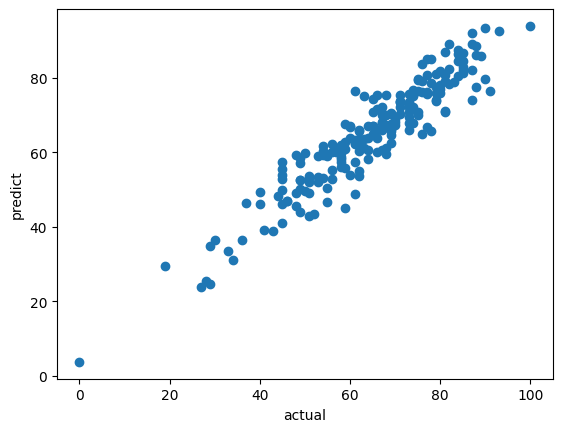

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predict')
plt.show()

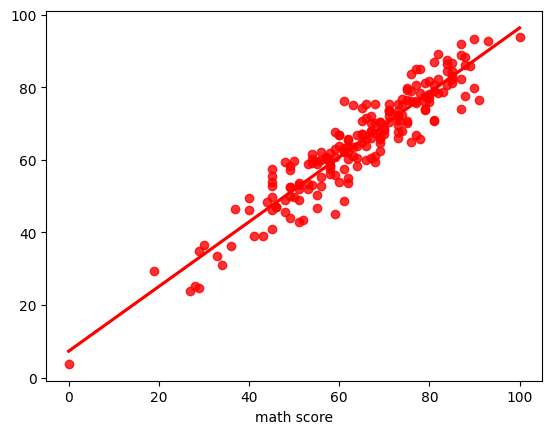

In [15]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')
plt.show()


Difference between actual and predicted values

In [16]:
pred_df=pd.DataFrame({"actual value":y_test,'predicted value':y_pred,'difference':y_test-y_pred})
pred_df

,actual value,predicted value,difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
